In [28]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.core.pylabtools import figsize

for simplisity in implementation we have used (precision τ = 1/variance)
and used the wighted average update style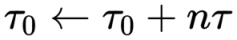

for updating mean we use following formulat:  
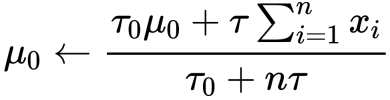  

'τ' is the precision (precision τ = 1/variance) of the actual arm output.  
'n' is the number of times the arm has been selected so far.  
'xᵢ' is the reward received at each test 'i' of this arm  
'μ₀' is the estimated mean (the mean of the distribution used to model the output).  
'τ₀' is the precision (precision τ = 1/variance) of the distribution used to model the output.  


In [29]:
class Gaussian_TS_Arm():
  def __init__(self, mean,sigma,μ_0 = 1,τ_0 = 0.0001):                        
    self.τ_0 = 0.0001
    self.μ_0 = 1  
    self.mean = mean
    self.sigma=sigma
    self.Q = 0
    self.n = 0
      
  def sample(self):
    return (np.random.randn() / np.sqrt(self.τ_0)) + self.μ_0

  def getReward(self):
    # value = np.random.randn() * self.sigma + self.mean
    # return 0 if value < 0 else value
    return np.random.randn() * self.sigma + self.mean

  def update(self,reward):
    self.n += 1
    self.Q = (1 - 1.0/self.n) * self.Q + (1.0/self.n) * reward # Q is mean of all rewards so far
    self.μ_0 = ((self.τ_0 * self.μ_0) + (self.n * self.Q))/(self.τ_0 + self.n)        
    self.τ_0 += 1

In [47]:
figsize(11.0, 10)
x = np.linspace(-10,10.0,400)
def plot_result(arms):
    trials = sum([arm.n for arm in arms])              
    for arm in arms:
        y = stats.norm.pdf( x, arm.μ_0, np.sqrt(1./arm.τ_0))        
        p = plt.plot(x, y, lw=2, label = f'{arm.n}/{trials}')
        c = p[0].get_markeredgecolor()
        plt.fill_between(x, y, 0, color=c, alpha=0.2 )
        plt.autoscale(tight = "True")
        plt.title(f"{trials} Trials")
        plt.legend()
        plt.autoscale(tight=True)

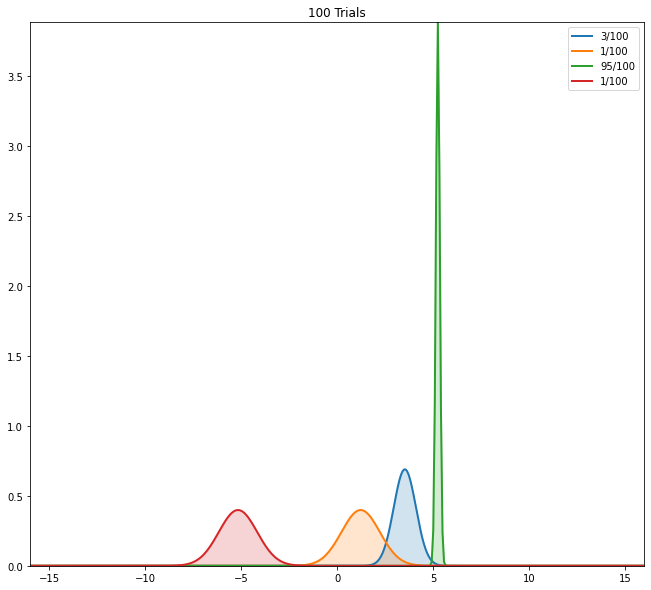

In [34]:
true_distribution_values = [(4,1),(2,2),(5,3),(-5,1)]
Arms = [Gaussian_TS_Arm(mean,sigma) for mean,sigma in true_distribution_values]
for i in range(100):
        arm_samples = [arm.sample() for arm in Arms]
        chosed_arm_index = np.argmax(arm_samples)
        reward = Arms[chosed_arm_index].getReward()
        Arms[chosed_arm_index].update(reward) 
plot_result(Arms)    
plt.autoscale(tight = True)

#2-b  For which parameter values (priors and σ2) is your strategy equivalent to the TS-Normal strategy of Agrawal and Goyal?
the presented prior and sigmas in the paper by argwal and goyal is as follow:

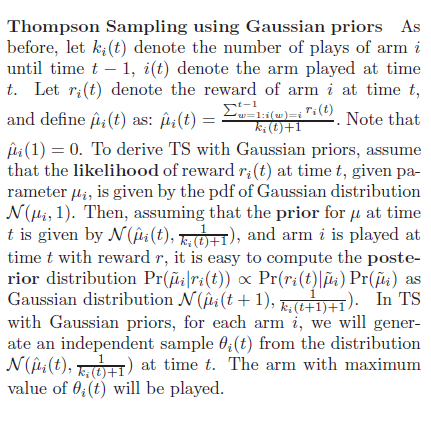

#2c  
**perform 100 instances of 2-actions**  
**m0 ∈ {0, 5, 10}**  
**σ2 = 0.25 and μk uniformly sampled in the interval [0, 10]**  
**Use the horizon T = 50**




 Results for m0 equals to: 0:


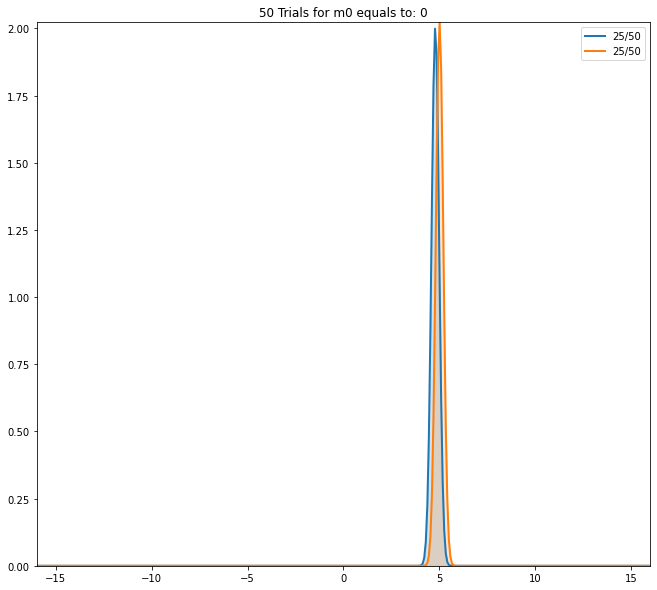




 Results for m0 equals to: 5:


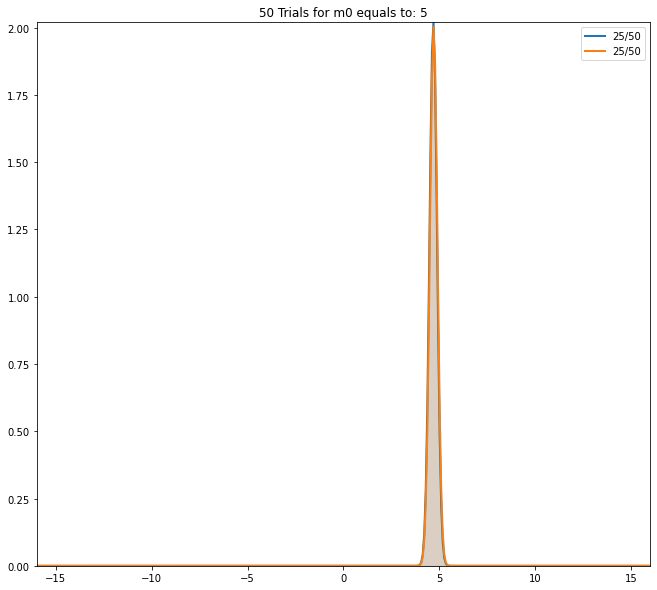




 Results for m0 equals to: 10:


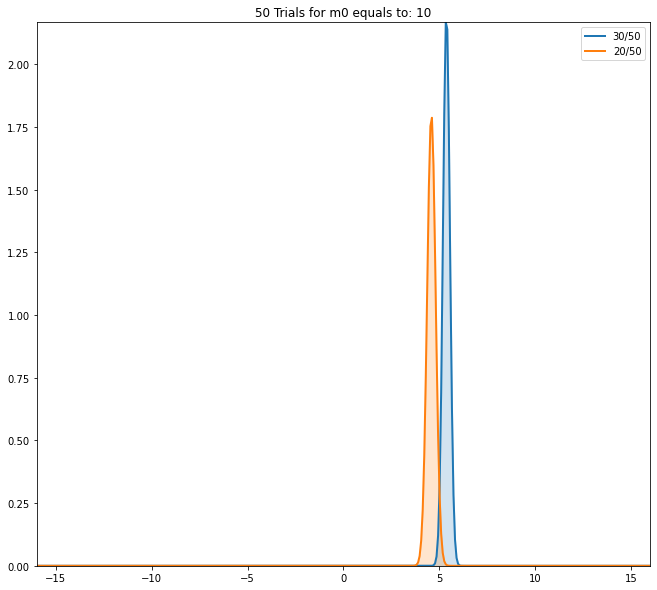

In [46]:
T=50 #horizon
M0=[0,5,10] # m0 ∈ {0, 5, 10}.
for m0 in M0:
  mu1,mu2,p1,p2,n1,n2=[],[],[],[],[],[]
  for i in range(100):
    #σ2 = 0.25 and μk uniformly sampled in the interval [0, 10] :
    true_distribution_values = [(np.random.uniform(low=0, high=10),0.25),(np.random.uniform(low=0, high=10),0.25)]
    Arms = [Gaussian_TS_Arm(mean,sigma,m0) for mean,sigma in true_distribution_values]
    for t in range(T+1):
            arm_samples = [arm.sample() for arm in Arms]
            chosed_arm_index = np.argmax(arm_samples)
            reward = Arms[chosed_arm_index].getReward()
            Arms[chosed_arm_index].update(reward)
    mu1.append(Arms[0].μ_0)
    mu2.append(Arms[1].μ_0)
    p1.append(Arms[0].τ_0)
    p2.append(Arms[1].τ_0)
    n1.append(Arms[0].n)
    n2.append(Arms[1].n)
  mu1=sum(mu1)/len(mu1)
  mu2=sum(mu2)/len(mu2)
  p1=sum(p1)/len(p1)
  p2=sum(p2)/len(p2)
  n1=int(sum(n1)/len(n1))
  n2=int(sum(n2)/len(n2))
  print(f"\n\n\n Results for m0 equals to: {m0}:")
  y = stats.norm.pdf( x, mu1, np.sqrt(1./p1))        
  p = plt.plot(x, y, lw=2, label = f'{n1}/{n1+n2}')
  c = p[0].get_markeredgecolor()
  plt.fill_between(x, y, 0, color=c, alpha=0.2 )
  y = stats.norm.pdf( x, mu2, np.sqrt(1./p2))        
  p = plt.plot(x, y, lw=2, label = f'{n2}/{n1+n2}')
  c = p[0].get_markeredgecolor()
  plt.fill_between(x, y, 0, color=c, alpha=0.2 )
  plt.autoscale(tight = "True")
  plt.title(f"{n1+n2} Trials for m0 equals to: {m0}")
  plt.legend()
  plt.autoscale(tight=True)
  plt.show()

# 2-d
**perform 100 instances of 2-actions**  
**σ2 = 0.25 and μk uniformly sampled in the interval [0.0, 1.0]**  
**Use the horizon T = 1000**  

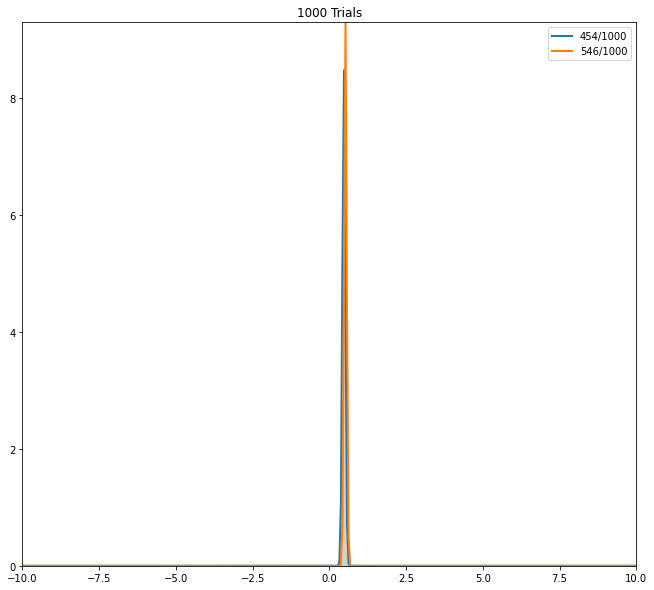

In [50]:
T=1000 #horizon
mu1,mu2,p1,p2,n1,n2=[],[],[],[],[],[]
for i in range(100):
  #σ2 = 0.25 and μk uniformly sampled in the interval [0, 10] :
  true_distribution_values = [(np.random.uniform(low=0, high=1),0.25),(np.random.uniform(low=0, high=1),0.25)]
  Arms = [Gaussian_TS_Arm(mean,sigma) for mean,sigma in true_distribution_values]
  for t in range(T+1):
          arm_samples = [arm.sample() for arm in Arms]
          chosed_arm_index = np.argmax(arm_samples)
          reward = Arms[chosed_arm_index].getReward()
          Arms[chosed_arm_index].update(reward)
  mu1.append(Arms[0].μ_0)
  mu2.append(Arms[1].μ_0)
  p1.append(Arms[0].τ_0)
  p2.append(Arms[1].τ_0)
  n1.append(Arms[0].n)
  n2.append(Arms[1].n)
mu1=sum(mu1)/len(mu1)
mu2=sum(mu2)/len(mu2)
p1=sum(p1)/len(p1)
p2=sum(p2)/len(p2)
n1=int(sum(n1)/len(n1))
n2=int(sum(n2)/len(n2))
y = stats.norm.pdf( x, mu1, np.sqrt(1./p1))        
p = plt.plot(x, y, lw=2, label = f'{n1}/{n1+n2}')
c = p[0].get_markeredgecolor()
plt.fill_between(x, y, 0, color=c, alpha=0.2 )
y = stats.norm.pdf( x, mu2, np.sqrt(1./p2))        
p = plt.plot(x, y, lw=2, label = f'{n2}/{n1+n2}')
c = p[0].get_markeredgecolor()
plt.fill_between(x, y, 0, color=c, alpha=0.2 )
plt.autoscale(tight = "True")
plt.title(f"{n1+n2} Trials")
plt.legend()
plt.autoscale(tight=True)
plt.show()